In [1]:
import numpy as np
import matplotlib.pyplot as plt
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

**Задание 1.** Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную `states`.

In [2]:
states=np.empty(20000)
state=np.array((1,0,0))
states[0]=0
for i in range(19999):
    new=np.random.choice(np.arange(3),p=state.dot(transition_matrix))
    states[i+1]=new
    state=np.zeros(3)
    state[new]=1
states

array([0., 1., 2., ..., 1., 2., 0.])

**Задание 2.** На основе массива `states` рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве `states[:n]` для `n`, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте `n`, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка:
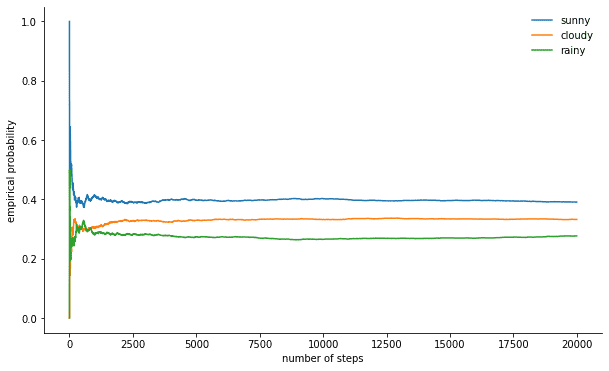

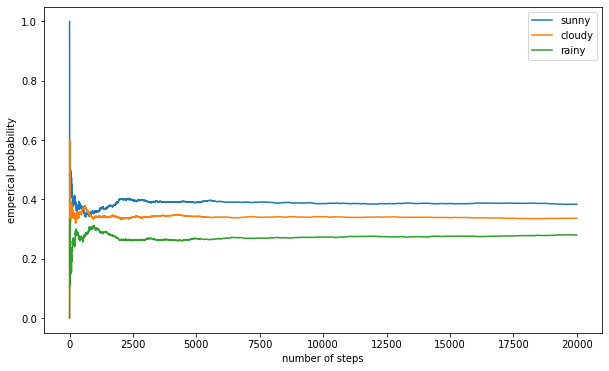

In [3]:
sunny=np.empty(20000)
cloudy=np.empty(20000)
for n in range(20000):
    sunny[n]=(states[:n+1]==0).sum()/(n+1)
    cloudy[n]=(states[:n+1]==1).sum()/(n+1)
rainy=1-sunny-cloudy
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(20000),sunny,label="sunny")
plt.plot(np.arange(20000),cloudy,label="cloudy")
plt.plot(np.arange(20000),rainy,label="rainy")
plt.xlabel('number of steps')
plt.ylabel('emperical probability')
plt.legend()
plt.show()

**Задание 3.** Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [4]:
p=np.array((sunny[-1],cloudy[-1],rainy[-1]))
print(p)
print(p.dot(transition_matrix))
power=transition_matrix
for i in range(20):
    power=power.dot(transition_matrix)
print(power)

[0.38375 0.3365  0.27975]
[0.38715 0.33365 0.2792 ]
[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


**Задание 4.** Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде 
p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [5]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

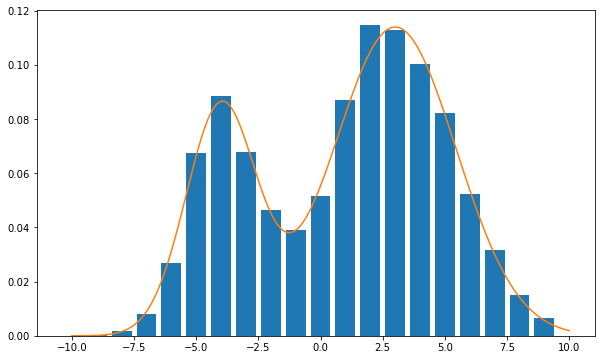

In [6]:
from scipy.stats import norm
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1])+10) % 20 - 10
post = metroplis(1, value, proposal, 10000)
plt.hist(post, bins=np.arange(21)-10.5, rwidth=0.8, density=True)
x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x, y)
plt.show()